In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
procs = [1] + list(range(4, 48 + 1, 4))
launches = [ launch for launch in procs for i in range(3)]

with open("parallel-08.output", "r") as file:
    chunks =[]
    for launch in launches:
        chunk = ""
        line_n = 0
        while line_n <= launch:
            line = file.readline()
            if line != '\n':
                line_n += 1
                chunk += line
        chunks.append(chunk[:-1])

In [4]:
data = []
for chunk, procs_n in zip(chunks, launches):
    trials = int(re.compile(" # of trials = (.*) ,").search(chunk).group(1))
    estimate = float(re.compile("estimate of pi is (.*) ").search(chunk).group(1))
    master_t = float(re.compile("master processor : (.*) ").search(chunk).group(1))
    procs_t = [float(re.compile("on processor {} : (.*) ".format(proc)).search(chunk).group(1)) for proc in range(1, procs_n)]
    data.append({"trials": trials, "estimate": estimate, "master_t": master_t, "procs_t": procs_t})

In [5]:
data[4]

{'trials': 100000000,
 'estimate': 3.14138216,
 'master_t': 0.64413674,
 'procs_t': [0.64407022, 0.64414092, 0.64370276]}

In [6]:
def get_formatted_data(output_name, error_name, launches):
    data = []
    trials_re = re.compile(" # of trials = (.*) ,")
    estimate_re = re.compile("estimate of pi is (.*) ")
    master_t_re = re.compile("master processor : (.*) ")
    elapsed_t_re = re.compile("system (.*)elapsed ")
    cpu_re = re.compile("elapsed (.*)%CPU ")
    with open(output_name, "r") as output, open(error_name, "r") as error:
        for launch in launches:
            o_chunk = ""
            o_line_n = 0
            e_chunk = ""
            while o_line_n <= launch:
                o_line = output.readline()
                if o_line != '\n':
                    o_line_n += 1
                    o_chunk += o_line
            trials = int(trials_re.search(o_chunk).group(1))
            estimate = float(estimate_re.search(o_chunk).group(1))
            master_t = float(master_t_re.search(o_chunk).group(1))
            procs_t = [master_t] + [float(re.compile("on processor {} : (.*) ".format(proc)).search(o_chunk).group(1)) for proc in range(1, launch)]
            e_chunk += error.readline()
            e_chunk += error.readline()
            elapsed_s = elapsed_t_re.search(e_chunk).group(1).split(":")
            elapsed_t = float(elapsed_s[-1]) + 60 * float(elapsed_s[-2])
            cpu = float(cpu_re.search(e_chunk).group(1))/100
            data.append({"P": launch,
                         "trials": trials,
                         "estimate": estimate,
                         "elapsed_t": elapsed_t,
                         "master_t": master_t,
                         "procs_t": procs_t,
                         "CPU": cpu
                         })
        return data

In [7]:
procs = [1] + list(range(4, 48 + 1, 4))
launches = [ launch for launch in procs for i in range(3)]

d08 = get_formatted_data("parallel-08.output", "parallel-08.error", launches)

In [8]:
d08[0]

{'P': 1,
 'trials': 100000000,
 'estimate': 3.14139104,
 'elapsed_t': 2.92,
 'master_t': 2.571225,
 'procs_t': [2.571225],
 'CPU': 0.95}

In [111]:
ddd=pd.DataFrame(d08)[["P","master_t","elapsed_t"]].groupby("P").mean()

In [112]:
ddd

,master_t,elapsed_t
P,,
1,2.574571,2.860000
4,0.645049,0.943333
8,0.322890,0.660000
12,0.219287,0.606667
16,0.166389,0.600000
20,0.136397,0.633333
24,0.116310,0.676667
28,0.104597,0.800000
32,0.106247,0.846667


In [114]:
ddd["r"] = ddd.loc[1, "master_t"] / ddd["master_t"]
ddd["re"] = ddd.loc[1, "elapsed_t"] / ddd["elapsed_t"]

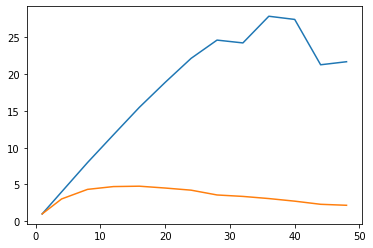

In [115]:
plt.plot(ddd[["r", "re"]])

In [118]:
d09 = get_formatted_data("parallel-09.output", "parallel-09.error", launches)

In [120]:
d09 = pd.DataFrame(d09)

In [125]:
d09[["P", "master_t", "elapsed_t"]].groupby("P").mean()

,master_t,elapsed_t
P,,
1,25.718885,25.986667
4,6.460006,6.770000
8,3.233128,3.580000
12,2.194665,2.593333
16,1.656970,2.100000
20,1.342580,1.843333
24,1.135838,1.703333
28,1.034970,1.726667
32,0.926676,1.656667


In [126]:
d09["r"] = d09.loc[1, "master_t"] / d09["master_t"]
d09["re"] = d09.loc[1, "elapsed_t"] / d09["elapsed_t"]

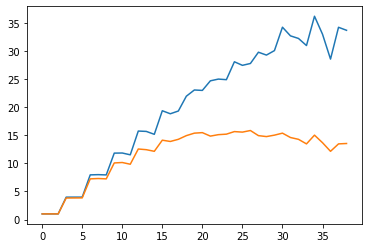

In [127]:
plt.plot(d09[["r", "re"]])